In [6]:
#loading the excel file
import pandas as pd
df = pd.read_excel('Strikers_performance.xlsx')
df

,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct
0,1,Spain,Left-footed,No,17.483571,10.778533,34.795488,0.677836,0.166241,0.757061,50.921924,71.806409,15.682532,30.412215,6.152481,0.820314,0.922727,8.570370,11.451388
1,2,France,Left-footed,Yes,14.308678,13.728250,31.472436,0.544881,0.192774,0.796818,61.396150,53.726866,19.843983,26.474913,6.093172,0.803321,0.678984,3.444638,8.243689
2,3,Germany,Left-footed,No,18.238443,3.804297,25.417413,0.518180,0.160379,0.666869,65.863945,60.452227,20.090084,24.164116,3.408714,0.766540,0.843858,8.429491,9.506835
3,4,France,Right-footed,No,22.615149,9.688908,20.471443,0.599663,0.184602,0.638776,88.876877,60.511979,22.363152,44.129989,6.339820,0.611798,0.662997,6.532552,8.199653
4,5,France,Left-footed,Yes,13.829233,6.048072,29.887563,0.582982,0.105319,0.591485,75.565531,54.982158,13.165708,37.859323,8.465658,0.701638,0.906538,8.414915,6.665333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,England,Left-footed,Yes,17.694550,7.156699,39.042650,0.707015,0.240660,0.707748,89.351540,60.284576,28.386885,39.510350,4.448635,0.767147,0.770213,5.999478,12.419711
496,497,Germany,Right-footed,Yes,9.813769,13.393060,39.430525,0.597348,0.186052,0.725775,78.155010,39.221882,15.974141,47.114106,6.742907,0.865265,0.876903,5.967767,8.653989
497,498,England,Left-footed,Yes,14.048307,9.922529,33.458564,0.511813,0.186012,0.575824,69.519115,56.797022,25.384241,71.129102,5.696650,0.628260,0.747261,11.249112,6.329751
498,499,England,Right-footed,Yes,10.621909,6.286463,32.168438,0.583693,0.239519,0.733418,68.168495,76.433782,9.151613,48.080362,2.611235,0.796795,0.799489,1.452370,11.305826


In [5]:
#Checking for missing values
missing_values = df.isnull().sum()
missing_values

Striker_ID                    0
Nationality                   0
Footedness                    0
Marital Status                0
Goals Scored                  0
Assists                       0
Shots on Target               0
Shot Accuracy                 0
Conversion Rate               0
Dribbling Success             0
Movement off the Ball         6
Hold-up Play                  0
Aerial Duels Won              0
Defensive Contribution        0
Big Game Performance          2
Consistency                   0
Penalty Success Rate          5
Impact on Team Performance    0
Off-field Conduct             0
dtype: int64

In [7]:
#Imputing missing vaues
from sklearn.impute import SimpleImputer

# Separate numeric and nominal columns
numeric_cols = df.select_dtypes(include=['float64']).columns
nominal_cols = df.select_dtypes(include=['object']).columns

# Impute numeric columns with the median
numeric_imputer = SimpleImputer(strategy='median')
df[numeric_cols] = numeric_imputer.fit_transform(df[numeric_cols])

# Impute nominal columns with the most frequent value
nominal_imputer = SimpleImputer(strategy='most_frequent')
df[nominal_cols] = nominal_imputer.fit_transform(df[nominal_cols])

In [9]:
#Confirmimg missing values have been imputed
df.isnull().sum()

Striker_ID                    0
Nationality                   0
Footedness                    0
Marital Status                0
Goals Scored                  0
Assists                       0
Shots on Target               0
Shot Accuracy                 0
Conversion Rate               0
Dribbling Success             0
Movement off the Ball         0
Hold-up Play                  0
Aerial Duels Won              0
Defensive Contribution        0
Big Game Performance          0
Consistency                   0
Penalty Success Rate          0
Impact on Team Performance    0
Off-field Conduct             0
dtype: int64

In [11]:
#Checking for correct data types
df.dtypes

Striker_ID                      int64
Nationality                    object
Footedness                     object
Marital Status                 object
Goals Scored                  float64
Assists                       float64
Shots on Target               float64
Shot Accuracy                 float64
Conversion Rate               float64
Dribbling Success             float64
Movement off the Ball         float64
Hold-up Play                  float64
Aerial Duels Won              float64
Defensive Contribution        float64
Big Game Performance          float64
Consistency                   float64
Penalty Success Rate          float64
Impact on Team Performance    float64
Off-field Conduct             float64
dtype: object

In [12]:
#assigning integer data types for certain columns
# Specifying the columns to convert to integer type
int_cols = [
    'Goals Scored', 'Assists', 'Shots on Target', 'Movement off the Ball',
    'Hold-up Play', 'Aerial Duels Won', 'Defensive Contribution',
    'Big Game Performance', 'Impact on Team Performance', 'Off-field Conduct'
]

# Converting specified columns to integer type
df[int_cols] = df[int_cols].astype(int)


In [13]:
df.dtypes

Striker_ID                      int64
Nationality                    object
Footedness                     object
Marital Status                 object
Goals Scored                    int64
Assists                         int64
Shots on Target                 int64
Shot Accuracy                 float64
Conversion Rate               float64
Dribbling Success             float64
Movement off the Ball           int64
Hold-up Play                    int64
Aerial Duels Won                int64
Defensive Contribution          int64
Big Game Performance            int64
Consistency                   float64
Penalty Success Rate          float64
Impact on Team Performance      int64
Off-field Conduct               int64
dtype: object

In [17]:
#Performing descriptive analysis on the dataset
desc_stats = df.describe().round(2)
desc_stats


,Striker_ID,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct
count,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00
mean,250.50,14.52,7.60,25.26,0.60,0.20,0.70,69.28,59.33,19.04,39.47,6.43,0.74,0.80,6.52,7.57
std,144.48,4.91,2.96,7.08,0.10,0.05,0.10,10.33,10.15,4.95,9.90,1.98,0.10,0.10,2.11,2.09
min,1.00,0.00,0.00,4.00,0.31,0.05,0.40,40.00,35.00,4.00,8.00,2.00,0.46,0.53,0.00,0.00
25%,125.75,11.00,6.00,20.00,0.54,0.17,0.64,62.00,52.00,16.00,33.00,5.00,0.68,0.72,5.00,6.00
50%,250.50,15.00,8.00,25.00,0.60,0.20,0.70,69.00,60.00,19.00,39.50,6.00,0.75,0.80,6.50,8.00
75%,375.25,18.00,9.00,30.00,0.67,0.23,0.76,76.00,66.00,22.00,46.00,8.00,0.81,0.87,8.00,9.00
max,500.00,34.00,15.00,43.00,0.92,0.36,1.00,98.00,92.00,34.00,71.00,12.00,1.00,1.00,13.00,13.00


In [18]:
#Performing percentage analysis
import matplotlib.pyplot as plt
import seaborn as sns

footedness_counts = df['Footedness'].value_counts()
perc_footedness = footedness_counts/len(df['Footedness']) * 100
perc_footedness

Footedness
Right-footed    53.4
Left-footed     46.6
Name: count, dtype: float64

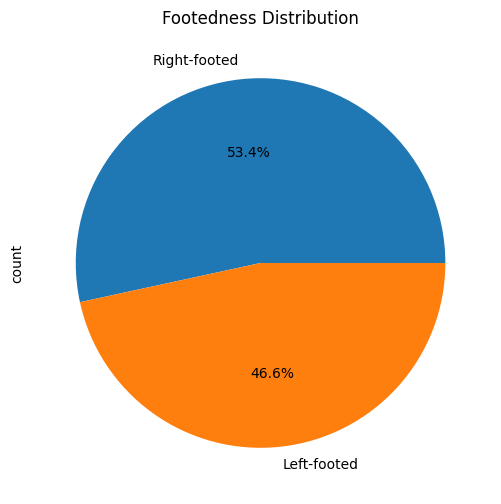

In [19]:
#Pie chart of footedness
footedness_counts.plot.pie(autopct='%1.1f%%', figsize=(6, 6))
plt.title('Footedness Distribution')
plt.show()

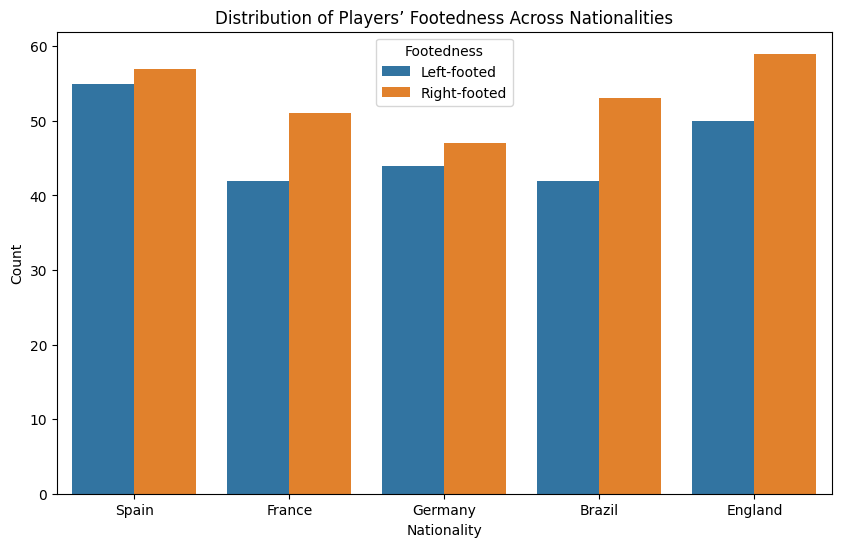

In [21]:
#Finding footedness across Nationality
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Nationality', hue='Footedness')
plt.title('Distribution of Players’ Footedness Across Nationalities')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.legend(title='Footedness')
plt.show()

In [24]:
#Statistical Analysis
#1 Nationality Strikers that have the highest number of average goals

avg_goals_by_nationality = df.groupby('Nationality')['Goals Scored'].mean().sort_values(ascending=False)
avg_goals_by_nationality.round(2)


Nationality
Brazil     15.32
Spain      14.69
France     14.41
Germany    14.35
England    13.90
Name: Goals Scored, dtype: float64

In [29]:
#2 Average conversion rate for players based on their footedness.

avg_conversion_by_footedness = df.groupby('Footedness')['Conversion Rate'].mean()
avg_conversion_by_footedness.round(3)


Footedness
Left-footed     0.198
Right-footed    0.201
Name: Conversion Rate, dtype: float64

In [39]:
#3 Checking for significant difference in consistency rates among strikers from various nationalities

from scipy.stats import shapiro, levene, f_oneway

consistency_groups = [group for _, group in df.groupby('Nationality')['Consistency']]
for nationality, group in df.groupby('Nationality'):
    stat, p_value = shapiro(group['Consistency'])
print(p_value.round(2))

0.63


In [35]:
stat, p_value = levene(*consistency_groups)
print(p_value.round(2))

0.81


In [40]:
stat, p_value = f_oneway(*consistency_groups)
print(p_value.round(2))

0.19


In [42]:
#Since the p value for each statistical tests are > 0.05, 
#there is NO significant difference in consistency rates among strikers from various nationalities

In [52]:
#4 Checking significant correlation and significance between strikers' Hold-up play and consistency rate
from scipy.stats import pearsonr
corr, p_value = pearsonr(df['Hold-up Play'], df['Consistency'])
print('Correlation:',corr.round(2),'P-value:',p_value.round(3))

Correlation: 0.15 P-value: 0.001


In [53]:
#there is a weak positive but significant correlation between strikers' Hold-up play and consistency rate

In [54]:
#Creating New Feature: Total contribution Score
df['Total Contribution Score'] = (
    df['Goals Scored'] + df['Assists'] + df['Shots on Target'] +
    df['Dribbling Success'] + df['Aerial Duels Won'] + df['Defensive Contribution'] +
    df['Big Game Performance'] + df['Consistency']
)
df['Total Contribution Score']

0      113.577376
1      110.600139
2       94.433410
3      124.250575
4      107.293123
          ...    
495    135.474895
496    130.591040
497    158.204084
498    108.530213
499    102.317446
Name: Total Contribution Score, Length: 500, dtype: float64

In [57]:
# Encode categorical variables: footedness and marital status
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Footedness'] = label_encoder.fit_transform(df['Footedness'])
df['Marital Status'] = label_encoder.fit_transform(df['Marital Status'])
df

,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total Contribution Score
0,1,Spain,0,0,17,10,34,0.677836,0.166241,0.757061,50,71,15,30,6,0.820314,0.922727,8,11,113.577376
1,2,France,0,1,14,13,31,0.544881,0.192774,0.796818,61,53,19,26,6,0.803321,0.678984,3,8,110.600139
2,3,Germany,0,0,18,3,25,0.518180,0.160379,0.666869,65,60,20,24,3,0.766540,0.843858,8,9,94.433410
3,4,France,1,0,22,9,20,0.599663,0.184602,0.638776,88,60,22,44,6,0.611798,0.662997,6,8,124.250575
4,5,France,0,1,13,6,29,0.582982,0.105319,0.591485,75,54,13,37,8,0.701638,0.906538,8,6,107.293123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,England,0,1,17,7,39,0.707015,0.240660,0.707748,89,60,28,39,4,0.767147,0.770213,5,12,135.474895
496,497,Germany,1,1,9,13,39,0.597348,0.186052,0.725775,78,39,15,47,6,0.865265,0.876903,5,8,130.591040
497,498,England,0,1,14,9,33,0.511813,0.186012,0.575824,69,56,25,71,5,0.628260,0.747261,11,6,158.204084
498,499,England,1,1,10,6,32,0.583693,0.239519,0.733418,68,76,9,48,2,0.796795,0.799489,1,11,108.530213


In [69]:
# Create dummy variables for Nationalit
#pd.get_dummies(df, columns=['Nationality'], drop_first=True)

df 

,Striker_ID,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,...,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total Contribution Score,Nationality_England,Nationality_France,Nationality_Germany,Nationality_Spain
0,1,0,0,17,10,34,0.677836,0.166241,0.757061,50,...,6,0.820314,0.922727,8,11,113.577376,False,False,False,True
1,2,0,1,14,13,31,0.544881,0.192774,0.796818,61,...,6,0.803321,0.678984,3,8,110.600139,False,True,False,False
2,3,0,0,18,3,25,0.518180,0.160379,0.666869,65,...,3,0.766540,0.843858,8,9,94.433410,False,False,True,False
3,4,1,0,22,9,20,0.599663,0.184602,0.638776,88,...,6,0.611798,0.662997,6,8,124.250575,False,True,False,False
4,5,0,1,13,6,29,0.582982,0.105319,0.591485,75,...,8,0.701638,0.906538,8,6,107.293123,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,0,1,17,7,39,0.707015,0.240660,0.707748,89,...,4,0.767147,0.770213,5,12,135.474895,True,False,False,False
496,497,1,1,9,13,39,0.597348,0.186052,0.725775,78,...,6,0.865265,0.876903,5,8,130.591040,False,False,True,False
497,498,0,1,14,9,33,0.511813,0.186012,0.575824,69,...,5,0.628260,0.747261,11,6,158.204084,True,False,False,False
498,499,1,1,10,6,32,0.583693,0.239519,0.733418,68,...,2,0.796795,0.799489,1,11,108.530213,True,False,False,False


In [73]:
#Performing KMeans Cluster analysis
from sklearn.cluster import KMeans
import numpy as np

# Selecting features for clustering
features = df.drop(['Striker_ID'], axis=1)
wcss = []

# Calculating WCSS for different cluster counts
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)
wcss

[313032.57036764646,
 232126.28532665665,
 205397.1154738398,
 183532.2226132581,
 166841.19756435475,
 159399.21121224164,
 150272.5906020839,
 145085.94080865654,
 138177.83152280163,
 134838.12190042867,
 132047.01392120952,
 125268.30046624586,
 122270.85514313828,
 117636.46112932343]

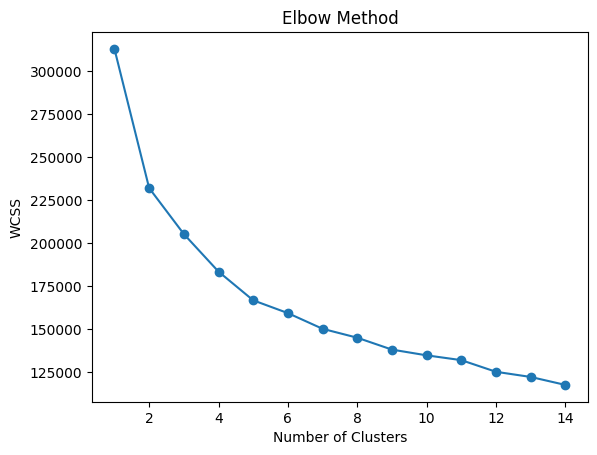

In [74]:
# Plotting Elbow Chart
plt.plot(range(1, 15), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [75]:
# Building the KMeans cluster with the optimal number of clusters (assuming 2 as per the elbow chart)
optimal_clusters = 2
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(features)

# Calculating the average Total Contribution Score by clusters
avg_contribution_by_cluster = df.groupby('Cluster')['Total Contribution Score'].mean()
print(avg_contribution_by_cluster)


Cluster
0    101.846088
1    123.350913
Name: Total Contribution Score, dtype: float64


In [76]:
# Map clusters to striker types
df['Strikers types'] = df['Cluster'].map({0: 'Best strikers', 1: 'Regular strikers'})

# Drop the Clusters variable
df = df.drop('Cluster', axis=1)


In [77]:
df

,Striker_ID,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,...,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total Contribution Score,Nationality_England,Nationality_France,Nationality_Germany,Nationality_Spain,Strikers types
0,1,0,0,17,10,34,0.677836,0.166241,0.757061,50,...,0.820314,0.922727,8,11,113.577376,False,False,False,True,Best strikers
1,2,0,1,14,13,31,0.544881,0.192774,0.796818,61,...,0.803321,0.678984,3,8,110.600139,False,True,False,False,Best strikers
2,3,0,0,18,3,25,0.518180,0.160379,0.666869,65,...,0.766540,0.843858,8,9,94.433410,False,False,True,False,Best strikers
3,4,1,0,22,9,20,0.599663,0.184602,0.638776,88,...,0.611798,0.662997,6,8,124.250575,False,True,False,False,Regular strikers
4,5,0,1,13,6,29,0.582982,0.105319,0.591485,75,...,0.701638,0.906538,8,6,107.293123,False,True,False,False,Best strikers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,0,1,17,7,39,0.707015,0.240660,0.707748,89,...,0.767147,0.770213,5,12,135.474895,True,False,False,False,Regular strikers
496,497,1,1,9,13,39,0.597348,0.186052,0.725775,78,...,0.865265,0.876903,5,8,130.591040,False,False,True,False,Regular strikers
497,498,0,1,14,9,33,0.511813,0.186012,0.575824,69,...,0.628260,0.747261,11,6,158.204084,True,False,False,False,Regular strikers
498,499,1,1,10,6,32,0.583693,0.239519,0.733418,68,...,0.796795,0.799489,1,11,108.530213,True,False,False,False,Regular strikers


In [78]:
# Mapping 'Strikers types' to integer values for machine learning
df['Strikers types'] = df['Strikers types'].map({'Best strikers': 1, 'Regular strikers': 0})


In [79]:
df

,Striker_ID,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,...,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total Contribution Score,Nationality_England,Nationality_France,Nationality_Germany,Nationality_Spain,Strikers types
0,1,0,0,17,10,34,0.677836,0.166241,0.757061,50,...,0.820314,0.922727,8,11,113.577376,False,False,False,True,1
1,2,0,1,14,13,31,0.544881,0.192774,0.796818,61,...,0.803321,0.678984,3,8,110.600139,False,True,False,False,1
2,3,0,0,18,3,25,0.518180,0.160379,0.666869,65,...,0.766540,0.843858,8,9,94.433410,False,False,True,False,1
3,4,1,0,22,9,20,0.599663,0.184602,0.638776,88,...,0.611798,0.662997,6,8,124.250575,False,True,False,False,0
4,5,0,1,13,6,29,0.582982,0.105319,0.591485,75,...,0.701638,0.906538,8,6,107.293123,False,True,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,0,1,17,7,39,0.707015,0.240660,0.707748,89,...,0.767147,0.770213,5,12,135.474895,True,False,False,False,0
496,497,1,1,9,13,39,0.597348,0.186052,0.725775,78,...,0.865265,0.876903,5,8,130.591040,False,False,True,False,0
497,498,0,1,14,9,33,0.511813,0.186012,0.575824,69,...,0.628260,0.747261,11,6,158.204084,True,False,False,False,0
498,499,1,1,10,6,32,0.583693,0.239519,0.733418,68,...,0.796795,0.799489,1,11,108.530213,True,False,False,False,0


In [80]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Prepare features and target
X = df.drop(['Striker_ID', 'Strikers types'], axis=1)
y = df['Strikers types']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



Accuracy: 96.00%


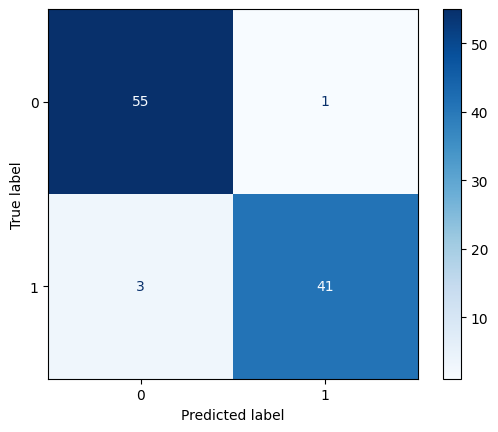

In [90]:
#Building a logistic regression machine learning model to predict strikers type
# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()
